In [897]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [898]:
cwd=os.getcwd()
full_path=os.path.join(cwd,"song_list_finished.csv")
df = pd.read_csv(full_path, delimiter="|", encoding='utf-8')
df.head()







,song_id,artist_id,song,artist,popularity,genres,danceability,energy,acousticness,instrumentalness,valence,speechiness,loudness,liveness
0,3mdJIP2Ugox0S8LybYlXGn,1MK0sGeyTNkbefYGj673e9,Entering the Pylon ov Light,Behemoth,6,"black metal, death metal, metal, pagan black m...",0.243,0.971,0.000159,0.871000,0.115,0.1700,-4.858,0.351
1,7oJrVhiTPZGBXWPwhxjy9S,7d3WFRME3vBY2cgoP38RDo,Lust,Lil Skies,75,"melodic rap, pop rap, rap, trap",0.718,0.767,0.138000,0.000000,0.519,0.1660,-5.641,0.114
2,2DOW9jRzPBY1f2Aa6hUvQn,5Jo9sTZnTmiQkml35GeOZa,Somagwaza (Arr. J. Maselwa for Mixed Chorus & ...,Florida All-State Middle School Mixed Chorus,0,school choir,0.239,0.541,0.766000,0.000002,0.382,0.3120,-23.301,0.924
3,2AIizSfkBphrOwFAf1wagJ,4sox56HkYoppCSBF6Trcwl,Mande Masa (The Unity of Africas Lands),Baba Sissoko,0,"griot, ngoni",0.535,0.844,0.567000,0.846000,0.941,0.0347,-10.671,0.132
4,2CwTM0MJUv1Jsf65hUiC6p,4GvOygVQquMaPm8oAc0vXi,I Wish You Loved You As Much As You Love Him (...,The Streets,40,"birmingham hip hop, grime, modern rock, uk garage",0.898,0.779,0.027100,0.000126,0.793,0.2310,-6.279,0.171


In [899]:
artist_name = "Sublime"
songs=df[df['artist']==artist_name]
print(songs['song'])

df =df.drop(columns=['song_id','artist_id','genres'])
df=df.dropna()
col=df.columns
row = list(col)
features= row[3:]
print(features)
#features = ['danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',	'speechiness',	'loudness',	'liveness']



9827                                            Paddle Out
33939                                      Same In The End
43003               Garden Grove - Live / Acoustic Version
47070                               Doin Time - Uptown Dub
56621                Were Only Gonna Die For Our Arrogance
67412              I Love My Dog - Live At The Palace/1995
87790                  Smoke Two Joints - Rarities Version
89385                                 What I Got - Reprise
91291                                           Paddle Out
92840    Were Only Gonna Die - Live At Kommotion, San F...
Name: song, dtype: object
['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'speechiness', 'loudness', 'liveness']


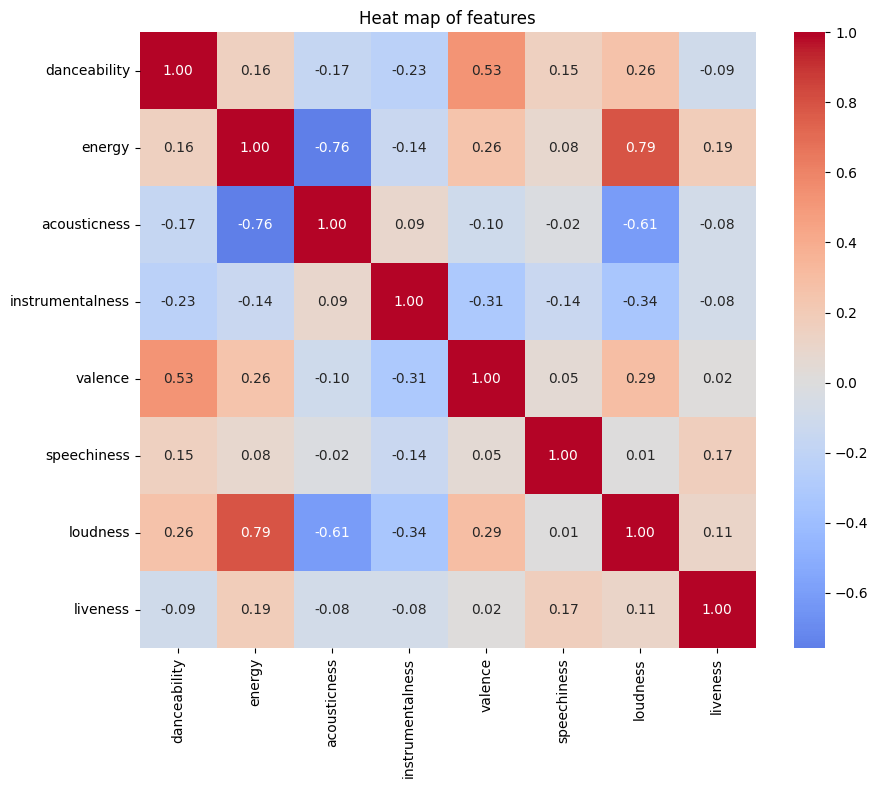

In [900]:
import matplotlib.pyplot as plt
import seaborn as s
x=df[features]

corr= x.corr()
plt.figure(figsize=(10,8))
s.heatmap(corr,annot=True,cmap='coolwarm',center=0,square=True,fmt='.2f')
plt.title("Heat map of features")
plt.show()


['energy', 'acousticness', 'energy-by-loud', 'mood-by-energy', 'energy-by-speechiness', 'mood-by-dance', 'live-by-loud', 'acousticness-by-energy', 'acousticness-by-loudness']
                          energy  acousticness  energy-by-loud  \
energy                      1.00         -0.76           -0.43   
acousticness               -0.76          1.00            0.34   
energy-by-loud             -0.43          0.34            1.00   
mood-by-energy              0.62         -0.39           -0.24   
energy-by-speechiness       0.39         -0.23           -0.20   
mood-by-dance               0.21         -0.11           -0.13   
live-by-loud                0.25         -0.25            0.17   
acousticness-by-energy     -0.18          0.66           -0.07   
acousticness-by-loudness    0.79         -0.85           -0.35   

                          mood-by-energy  energy-by-speechiness  \
energy                              0.62                   0.39   
acousticness                  

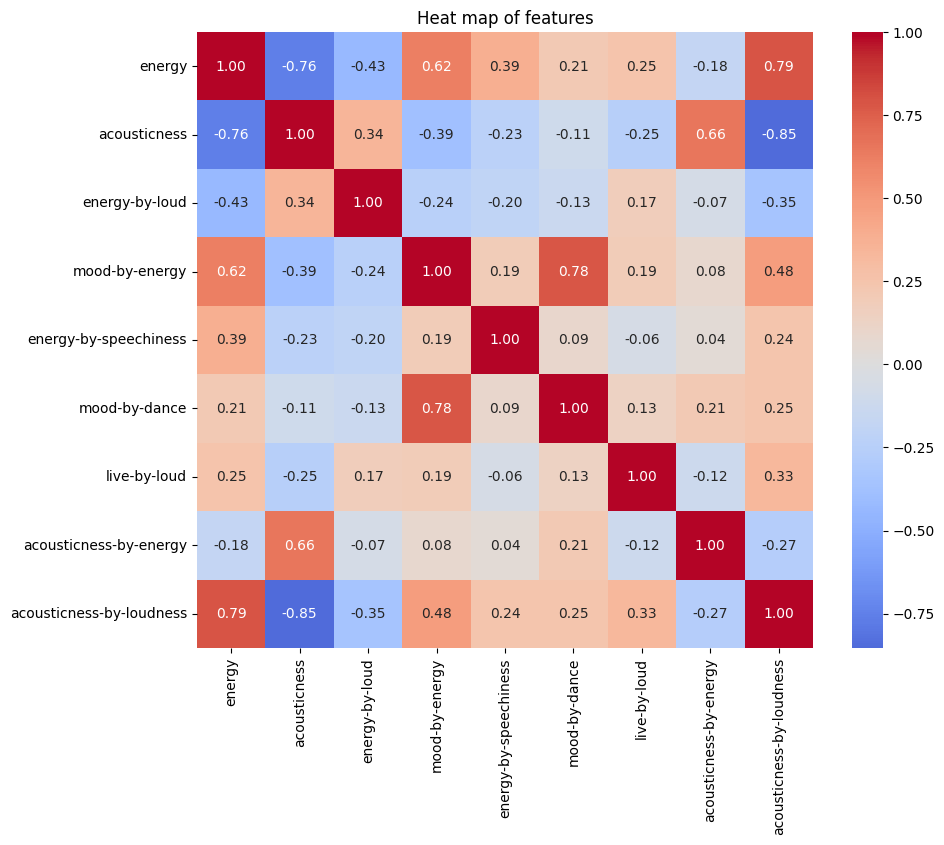

In [901]:
df["energy-by-loud"]= (df['loudness']*df['energy'])
df['mood-by-energy'] = (df['valence']*df['energy'])
df['energy-by-speechiness'] = (df['energy']*df['speechiness'])
df['mood-by-dance'] = (df['valence']*df['danceability'])
df['live-by-loud'] = (df['loudness']*df['liveness'])
df['acousticness-by-energy'] = df['acousticness']*df['energy']
df['acousticness-by-loudness'] = df['acousticness']*df['loudness']
df=df.drop(columns=['valence','instrumentalness','liveness','speechiness','danceability','loudness'])
features=list(df.columns)
features=features[3:]
x=df[features]

corr= x.corr()
print(features)
print(corr.round(2))
plt.figure(figsize=(10,8))
s.heatmap(corr,annot=True,cmap='coolwarm',center=0,square=True,fmt='.2f')
plt.title("Heat map of features")
plt.show()





Variance total: 0.962
[0.405 0.192 0.144 0.095 0.081 0.045]


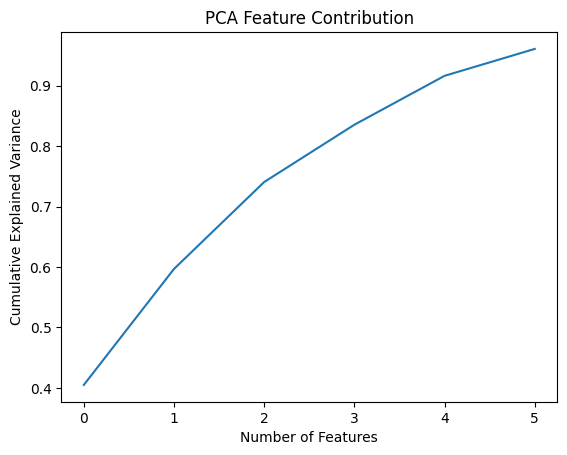

In [902]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA(n_components=6)
pca.fit(X_scaled)
var=pca.explained_variance_ratio_.round(3)
sum=0
for f in var:
    sum+=f
print(f'Variance total: {sum}')
print(pca.explained_variance_ratio_.round(3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Feature Contribution')
plt.show()

In [903]:
from sklearn.neighbors import NearestNeighbors

# Initialize KNN (you can experiment with metric too: 'cosine', 'euclidean', etc.)
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # 6 = 5 neighbors + the input song itself
knn.fit(X_scaled)



NearestNeighbors(metric='cosine', n_neighbors=6)